In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from ieee80211phy.util import *
from ieee80211phy.receiver import *
%load_ext autoreload
%autoreload 2

In [ ]:
from numpy import sqrt
from numpy.random import rand, randn
import matplotlib.pyplot as plt
  
N = 5000000
EbNodB_range = range(-12,11)
itr = len(EbNodB_range)
ber = [None]*itr

for n in range (0, itr): 
 
    EbNodB = EbNodB_range[n]   
    EbNo=10.0**(EbNodB/10.0)
    x = 2 * (rand(N) >= 0.5) - 1
    noise_std = 1/sqrt(2*EbNo)
    y = x + noise_std * randn(N)
    y_d = 2 * (y >= 0) - 1
    errors = (x != y_d).sum()
    ber[n] = 1.0 * errors / N
    
    print ("EbNodB:", EbNodB)
    print ("Error bits:", errors)
    print ("Error probability:", ber[n]) 
        

In [ ]:
plt.plot(EbNodB_range, ber, 'bo', EbNodB_range, ber, 'k')
# plt.axis([0, 10, 1e-6, 0.1])
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.grid(True)
plt.title('BPSK Modulation')
plt.show()

In [ ]:
b = Bits('0x001248')

In [ ]:
b

In [ ]:
my_hexdata = '1248'
num_of_bits = int(len(my_hexdata) * np.log2(16))
bb = int_to_binstr(int(my_hexdata, 16), num_of_bits)
print(bb)

bbb = flip_byte_endian(bb)
print(bbb)

In [ ]:
bits, iq = default_iee80211_package()

In [ ]:
res = receiver(iq[160+32:])

In [ ]:
res.bits

In [ ]:
bits

In [ ]:
diff = len([True for x, y in zip(bits, res.bits) if x != y])
diff

In [ ]:
input = Bits('0x0402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F662064'
             '6976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074'
             '726561673321B6')

from ieee80211phy.transmitter import transmitter
input, transmitter(Bits(input), data_rate=36)

In [13]:
default_iee80211_package()

[autoreload of ieee80211phy.receiver failed: Traceback (most recent call last):
  File "/usr/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/usr/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 376, in superreload
    module = reload(module)
  File "/usr/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/gaspar/git/ieee80211phy/ieee80211phy/receiver.py", line 15, in <module>
    from ieee80211phy.signal_field import decode
ImportError: cannot import name 'decode' from 'ieee80211phy.signal_field' (/home/gaspar/git/ieee80211phy/i

('00100000010000000000000001110100000000000000011000010000101100111110110001100101000000000000010001101011100000000011110010001111000000000000011000010000101101011101110011110101000000000000000001010010111101101001111000110100000001000100011001001110100101101110011000010110001011100000010011001110000011101000011001001110110101100000010011110110011001100000010000100110100101100110111010010110011101101001011000101110100111100011010001010000001000101000011010101110111001100001011000101110101001100100111000000100111101100110011000000100101000100011011010011110110011101001011010101110101101100011010001010000011000101001011001001110101001101011010010010110011101101100111010010110010011101010011000100110000001001110111010100110000001000010111001001110101001101000011011100110110011001000010001101101001000000100000000000000011101000000000000000110000100001011001111101100011001010000000000000100011010111000000000111100100011110000000000000110000100001011010111011100111101010000000000000000010100

In [ ]:
logging.disable(logging.INFO)


In [11]:
rates1 = [bit_error_rate(i) for i in range(0, 25)]

INFO:ieee80211phy.transmitter:Package 1100 bytes, 92 OFDM symbols (10 padding bits added)
	 data_rate=24, modulation=16-QAM, coding_rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=7, rate=1/2
INFO:ieee80211phy.receiver:Package 561 bytes -> 24 OFDM symbols @ 48MB/s (64-QAM, 2/3)
INFO:ieee80211phy.conv_coding:Decoded 4608 bits, error_score=494, rate=2/3
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=3, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2212, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=4, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2212, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=7, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=8, rate=1/2
INFO:ieee80211

INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2211, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=2, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2200, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=5, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2199, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=3, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2203, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=2, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM sym

INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=2, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2194, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=2, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2194, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=4, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2212, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=5, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2209, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=2

INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2221, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=5, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=3, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2203, rate=1/2
INFO:ieee80211phy.transmitter:Package 1100 bytes, 92 OFDM symbols (10 padding bits added)
	 data_rate=24, modulation=16-QAM, coding_rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=1, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2213, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2208, rate=1/2
INFO:ie

INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2208, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2192, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=6, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2197, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2222

INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=1, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2156, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2196, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2186, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=1, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2193, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0

INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2155, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2145, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2172, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2167, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM sym

INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2062, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=7, rate=1/2
INFO:ieee80211phy.receiver:Package 177 bytes -> 7 OFDM symbols @ 54MB/s (64-QAM, 3/4)
INFO:ieee80211phy.conv_coding:Decoded 1512 bits, error_score=104, rate=3/4
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2039, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2121, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=20

INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=1889, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=1882, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=1827, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=1907, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0

INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=1851, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=1790, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=1839, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=1560, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM sym

INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=1231, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=1227, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=1532, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=1314, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score

INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=1521, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=932, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=1017, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=1126, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0,

INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=752, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=862, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=807, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=1371, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=89

INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=888, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=475, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=975, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=796, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols

INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=306, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=342, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=371, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=619, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, ra

INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=244, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=292, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=230, rate=1/2
INFO:ieee80211phy.transmitter:Package 1100 bytes, 92 OFDM symbols (10 padding bits added)
	 data_rate=24, modulation=16-QAM, coding_rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=124, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80

INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=97, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=35, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=44, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=66, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1

INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=25, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=33, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=18, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=1, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=63, rate

INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=10, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=29, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=5, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=9, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24M

INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=0, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=0, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
I

INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=3, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=2, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=1, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
I

INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=0, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=0, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=0, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=3, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
I

INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=0, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=0, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=0, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 1100 bytes -> 92 OFDM symbols @ 24MB/s (16-QAM, 1/2)
INFO:ieee80211phy.conv_coding:Decoded 8832 bits, error_score=0, rate=1/2
INFO:ieee80211phy.conv_coding:Decoded 24 bits, error_score=0, rate=1/2
I

<IPython.core.display.Javascript object>


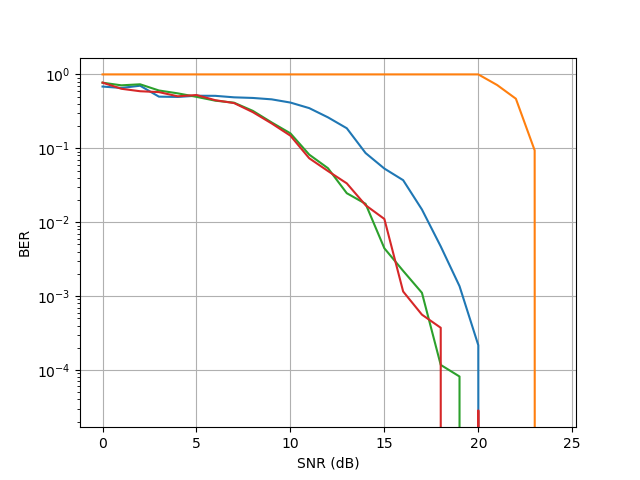

In [6]:
plt.plot(rates1)
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.grid(True)
# plt.title('BPSK Modulation')
plt.show()

In [12]:

plt.plot(rates1)
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.grid(True)
# plt.title('BPSK Modulation')
plt.show()